In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
scores = pd.read_csv(url)

In [3]:
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [4]:
import seaborn as sns
sns.set_style('whitegrid')

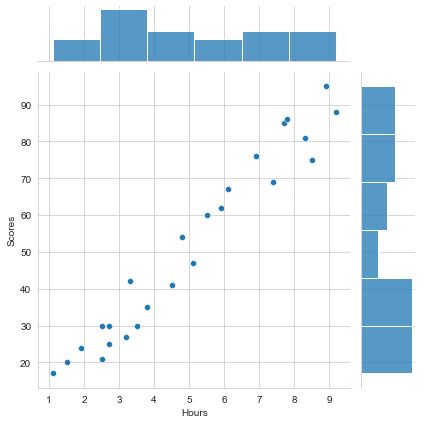

In [5]:
sns.jointplot(x='Hours', y='Scores', data=scores)

### Training our Model

In [9]:
X = scores['Hours'].values.reshape(-1,1)
y = scores['Scores'].values.reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
lm.coef_

array([[9.65029083]])

### Predicting the Output

In [16]:
predictions = lm.predict(X_test)

In [29]:
y_test

array([[81],
       [30],
       [21],
       [76],
       [62],
       [25],
       [42],
       [47],
       [35]], dtype=int64)

In [28]:
predictions

array([[83.50244409],
       [27.53075726],
       [27.53075726],
       [69.99203692],
       [60.34174609],
       [29.46081542],
       [35.25098992],
       [52.62151342],
       [40.07613534]])

Text(0, 0.5, 'Predicted Y')

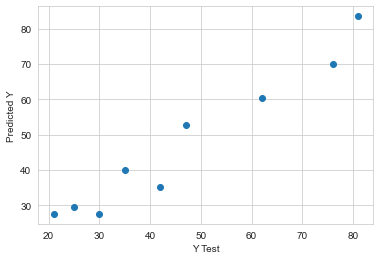

In [17]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [18]:
from sklearn import metrics

In [19]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))

MAE:  4.564015037730867


In [20]:
print('MSE: ', metrics.mean_squared_error(y_test, predictions))

MSE:  24.074686364260973


In [21]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE:  4.9065962096203695


In [22]:
metrics.explained_variance_score(y_test, predictions)

0.9450945320101042

### What will be the predicted score if a student studies for 9.25 hrs/day?

In [36]:
x = np.array(9.25)

In [39]:
x = x.reshape(1,-1)

In [40]:
lm.predict(x)

array([[92.67022038]])

##### Answer is 92.6 approximately.